specificazioni:  [0.06666667 0.13333333 0.2        0.26666667 0.33333333 0.4
 0.46666667 0.53333333 0.6        0.66666667 0.73333333 0.8
 0.86666667 0.93333333 1.         1.06666667 1.13333333 1.2
 1.26666667 1.33333333 1.4        1.46666667 1.53333333 1.6
 1.66666667 1.73333333 1.8        1.86666667 1.93333333 2.
 2.06666667 2.13333333 2.2       ]
numero di occorrenze per specificazione:  [    21    148    561   1916   5223  11545  22371  37612  56453  75627
  93166 104828 108575 104532  94483  80019  63605  47556  33536  23063
  14727   8840   5328   3045   1580    866    397    204     82     53
     31      5      2]


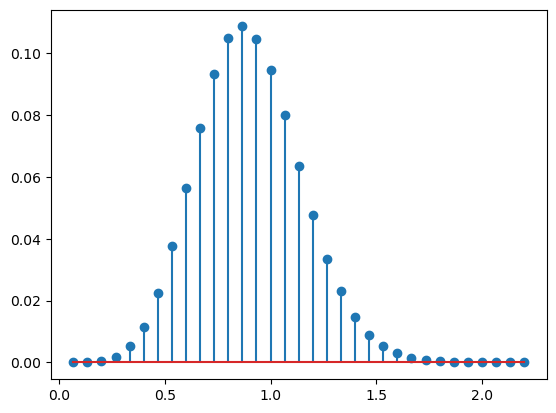

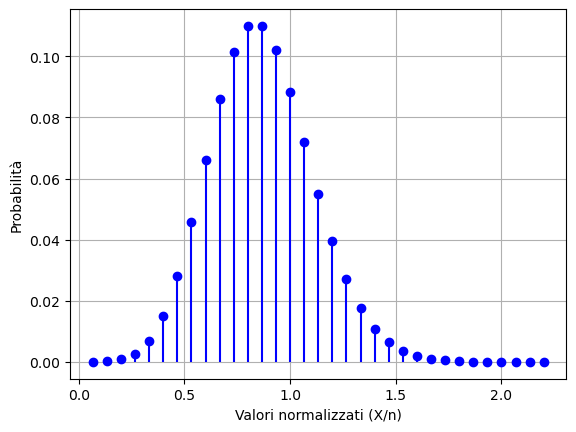

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import math

# Teorico
lamd = 0.9
num_sample = 1000000
n = 15
S = st.poisson(n*lamd)
S = S.rvs(num_sample)

S2 = 1/n* S

# ritornami solo gli unici
unique_values, counts = np.unique(S2, return_counts = True) 
# counts --> numero di occorrenze per ciascuna specificazione della distribuzione Z
print("specificazioni: ",unique_values) # {b, a+b}
print("numero di occorrenze per specificazione: ", counts)

# Grafico generato a partire da una pmf calcolata "a mano" (grafico empirico):
pmf = counts / num_sample # pmf --> funzione di massa di probabilità
plt.stem(unique_values, pmf)
plt.show()

# Parametri
lamd = 0.9
n = 15


# Distribuzione teorica
def pmf_e(lamd_e, n_e, x_e):
    mu = int(n_e*lamd_e)
    info2 = int(n_e*x_e)
    return (math.exp(-mu)*(mu)**info2) / math.factorial(info2)

pmf_theoretical = [pmf_e(lamd, n, x) for x in unique_values]

# Plot
plt.stem(unique_values, pmf_theoretical, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlabel("Valori normalizzati (X/n)")
plt.ylabel("Probabilità")
plt.grid(True)
plt.show()





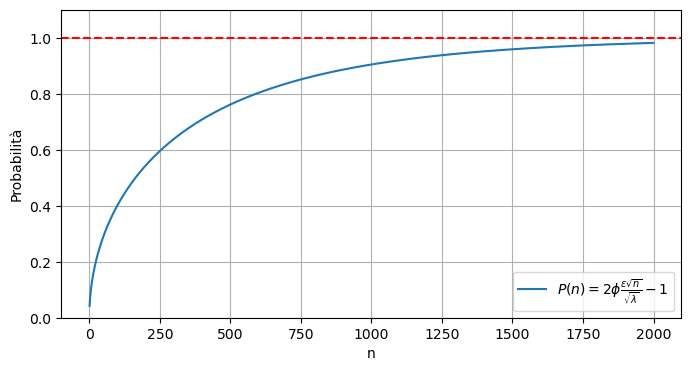

In [4]:
from scipy.stats import norm

lam = 0.9
epsilon = 0.05

def val_probabilita(n):
    z = epsilon * np.sqrt(n) / np.sqrt(lam)
    p = 2 * norm.cdf(z) - 1
    return p

x = np.arange(1, 2000)
y = [val_probabilita(n) for n in x]

plt.figure(figsize=(8, 4))
plt.plot(x, y, label=r'$P(n) = 2\phi \frac{\epsilon\sqrt{n}}{\sqrt{\lambda}} - 1$')
plt.axhline(1, color="red", linestyle="dashed")
plt.ylim(0, 1.1)
plt.xlabel('n')
plt.ylabel('Probabilità')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# importo il file in una variabile accessi

#accessi = pd.read_csv('/accessi.csv', delimiter=',', decimal=',', quotechar='"')

import csv
from collections import defaultdict

# Dizionario che mappa 'allarme' -> numero di valori mancanti
missing_counts = defaultdict(int)

with open("accessi.csv", newline="") as accessi:
    reader = csv.DictReader(accessi)

    for row in reader:
        allarme = row["allarme"]
        # Conta le celle vuote (tranne 'allarme')
        missing = sum(1 for k, v in row.items() if k != "allarme" and v.strip() == "")
        missing_counts[allarme] += missing

# Stampa il risultato
for stato_allarme, count in missing_counts.items():
    print(f"Valori mancanti per allarme={stato_allarme}: {count}")



Valori mancanti per allarme=ON: 4
Valori mancanti per allarme=OFF: 11
Valori mancanti per allarme=: 0
